In [3]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imshow
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.models import Sequential

In [4]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

Closed=load_images_from_folder('dataset_Eyes_Facial-images/ClosedFace/')
Open=load_images_from_folder('dataset_Eyes_Facial-images/OpenFace/')
len(Open),len(Closed)

(1231, 1192)

In [5]:
cv2.imshow("f",Closed[0])
cv2.waitKey(0)
# cv2.destroyAllWindows()

27

In [6]:
Ones=np.ones((1,1231), np.int8).T
Zeros=np.zeros((1,1192), np.int8).T
Ones.shape,Zeros.shape

((1231, 1), (1192, 1))

In [7]:
X = np.array(Open+Closed)/255
Y = np.concatenate((Ones,Zeros))
X.shape,Y.shape

((2423, 100, 100, 3), (2423, 1))

In [8]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state=123)
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1938
number of test examples = 485
X_train shape: (1938, 100, 100, 3)
Y_train shape: (1938, 1)
X_test shape: (485, 100, 100, 3)
Y_test shape: (485, 1)


Image shape : (100, 100, 3) 
class: [1]


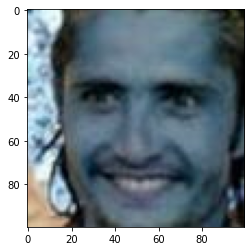

In [9]:
print("Image shape :",X_train[21].shape,'\nclass:',Y_train[21])
imshow(X_train[21])

In [10]:
model = Sequential([Conv2D(filters=256, kernel_size=(7,7), activation='relu', padding='same',
                     input_shape=(100, 100, 3)),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(2,2)),
                    Flatten(),
                    Dense(units =1, activation='sigmoid') ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 256)     37888     
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 256)     1024      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 640000)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 640001    
Total params: 678,913
Trainable params: 678,401
Non-trainable params: 512
_________________________________________________________________


In [11]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

In [12]:
history_model = model.fit(X_train, Y_train,
                    batch_size=4,
                    epochs=10)

Epoch 1/10
485/485 [==============================] - 101s 207ms/step - loss: 5.5242 - accuracy: 0.6754
Epoch 2/10
485/485 [==============================] - 95s 196ms/step - loss: 2.2633 - accuracy: 0.7430
Epoch 3/10
485/485 [==============================] - 96s 198ms/step - loss: 2.3613 - accuracy: 0.7570
Epoch 4/10
485/485 [==============================] - 97s 200ms/step - loss: 1.9633 - accuracy: 0.7652
Epoch 5/10
485/485 [==============================] - 97s 200ms/step - loss: 1.1003 - accuracy: 0.8024
Epoch 6/10
485/485 [==============================] - 99s 204ms/step - loss: 0.7481 - accuracy: 0.8462
Epoch 7/10
485/485 [==============================] - 98s 202ms/step - loss: 0.5682 - accuracy: 0.8607
Epoch 8/10
485/485 [==============================] - 99s 205ms/step - loss: 0.6517 - accuracy: 0.8462
Epoch 9/10
485/485 [==============================] - 99s 204ms/step - loss: 0.6773 - accuracy: 0.8612
Epoch 10/10
485/485 [==============================] - 99s 205ms/step - 

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=32)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

16/16 [==============================] - 5s 275ms/step - loss: 1.9910 - accuracy: 0.7546
Test loss: 1.9910 accuracy: 0.7546


In [18]:
model.save('face_model')

INFO:tensorflow:Assets written to: face_model\assets


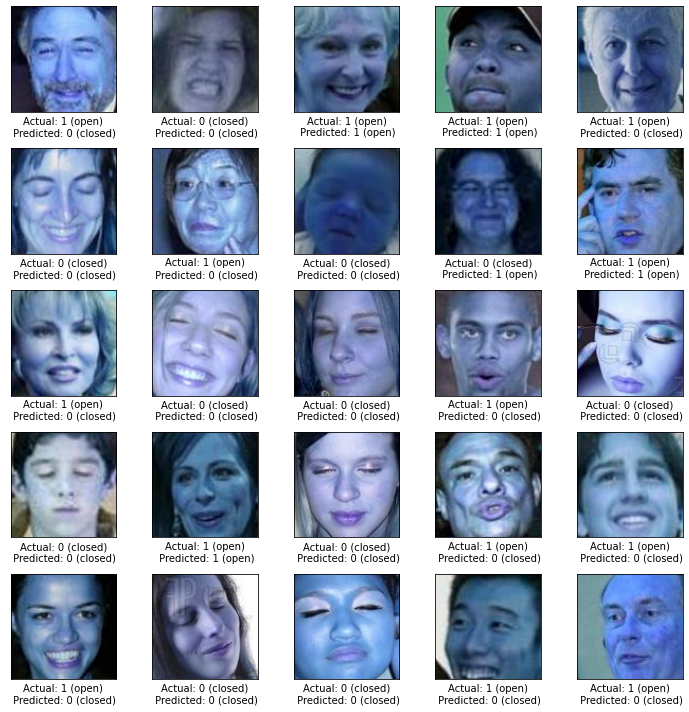

In [14]:
import matplotlib.pyplot as plt

Y_pred=model.predict(X_test)
labels=['closed','open']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 485) 
    imshow(X_test[img_index])
    
    actual_label = int(Y_test[img_index])
    predicted_label = int(Y_pred[img_index])
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, labels[actual_label], predicted_label, labels[predicted_label]
    ))

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow import keras
model = keras.models.load_model('face_model')

# Tester 1

In [21]:
cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
#face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye_tree_eyeglasses.xml')
while cv2.waitKey(1) != 27:
    has_frame, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    # Draw the rectangle around each face
    predicted=[]
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        predicted.append(cv2.resize(img[y:y+h,x:x+w], (100,100)))
    if len(predicted)==1:
        pred=model.predict(np.array(predicted))
        cv2.putText(img,str(int(pred[0])),(50,50),cv2.FONT_HERSHEY_COMPLEX,.8,(0,255,0),2)
    cv2.imshow('img', img)
cv2.destroyAllWindows()

# Tester 2

In [22]:
import cv2

source = cv2.VideoCapture(0)

win_name = 'Camera Preview'
cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)

net = cv2.dnn.readNetFromCaffe("deploy.prototxt","res10_300x300_ssd_iter_140000_fp16.caffemodel")

# Model parameters
in_width = 300
in_height = 300
mean = [104, 117, 123]
conf_threshold = 0.7

while cv2.waitKey(1) != 27:
    has_frame, frame = source.read()
    if not has_frame:
        print("f")
        break
    frame = cv2.flip(frame,1)
    frame_height = frame.shape[0]
    frame_width = frame.shape[1]

    # Create a 4D blob from a frame.
    blob = cv2.dnn.blobFromImage(frame, 1.0, (in_width, in_height), mean, swapRB = False, crop = False)
    # Run a model
    net.setInput(blob)
    detections = net.forward()
    predicted = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x_left_bottom = int(detections[0, 0, i, 3] * frame_width)
            y_left_bottom = int(detections[0, 0, i, 4] * frame_height)
            x_right_top = int(detections[0, 0, i, 5] * frame_width)
            y_right_top = int(detections[0, 0, i, 6] * frame_height)
            cv2.rectangle(frame, (x_left_bottom, y_left_bottom), (x_right_top, y_right_top), (0, 255, 0))
            label = "Confidence: %.4f" % confidence
            label_size, base_line = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)

            cv2.rectangle(frame, (x_left_bottom, y_left_bottom - label_size[1]),
                                (x_left_bottom + label_size[0], y_left_bottom + base_line),
                                (255, 255, 255), cv2.FILLED)
            cv2.putText(frame, label, (x_left_bottom, y_left_bottom),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
            predicted.append(cv2.resize(frame[y:y+h,x:x+w], (100,100)))
    if len(predicted)==1:
        pred=model.predict(np.array(predicted)/255)
        if pred[0]==0:
            cv2.putText(frame,'Closed',(50,50),cv2.FONT_HERSHEY_COMPLEX,.8,(0,255,0),2)
        else:
            cv2.putText(frame,'Open',(50,50),cv2.FONT_HERSHEY_COMPLEX,.8,(0,255,0),2)
    t, _ = net.getPerfProfile()
    label = 'Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency())
    cv2.putText(frame, label, (0, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0))
    cv2.imshow(win_name, frame)

source.release()
cv2.destroyWindow(win_name)


NameError: name 'model2' is not defined